In [4]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from modules.Utils import KETIDB
from modules.KMeans import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': (15.7, 13.27)})
plt.rcParams['figure.figsize'] = 15.7,13.27
plt.rcParams['font.family'] = 'AppleGothic'

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

db = KETIDB()
db.connect()

connect KETIDB,,,
connect success!!


아파트1-101-1302: pattern recognition start
---Init KMeans---
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Now 2---
---Now 3---
---Now 4---
---Now 5---
---Now 6---
---Now 7---
---Now 8---
---Now 9---
---Now 10---
아파트3-101-506: pattern recognition start
---Init KMeans---
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Now 2---
---Now 3---
---Now 4---
---Now 5---
---Now 6---
아파트2-3-1304: pattern recognition start
---Init KMeans---
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Now 2---
---Now 3---
---Now 4---
---Now 5---
---Now 6---
---Now 7---
---Now 8---
---Now 9---
---Now 10---
---Now 11---
---Now 12---
아파트1-101-1604: pattern recognition start
---Init KMeans---
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Now 2---
---Now 3---
---Now 4---
---Now 5---
---Now 6---
---Now 7---
아파트3-101-1001: pattern recognition start
--

---Now 2---
---Now 3---
---Now 4---
---Now 5---
---Now 6---
---Now 7---
---Now 8---
---Now 9---
---Now 10---
아파트2-5-1507: pattern recognition start
---Init KMeans---
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Now 2---
---Now 3---
---Now 4---
---Now 5---
---Now 6---
---Now 7---
아파트3-102-1202: pattern recognition start
---Init KMeans---
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Now 2---
---Now 3---
---Now 4---
---Now 5---
---Now 6---
---Now 7---
아파트4-103-206: pattern recognition start
---Init KMeans---
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Now 2---
---Now 3---
---Now 4---
---Now 5---
---Now 6---
---Now 7---
---Now 8---
아파트1-103-1504: pattern recognition start
---Init KMeans---
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Now 2---
---Now 3---
---Now 4---
---Now 5---
---Now 6---
---Now 7---
---Now 8--

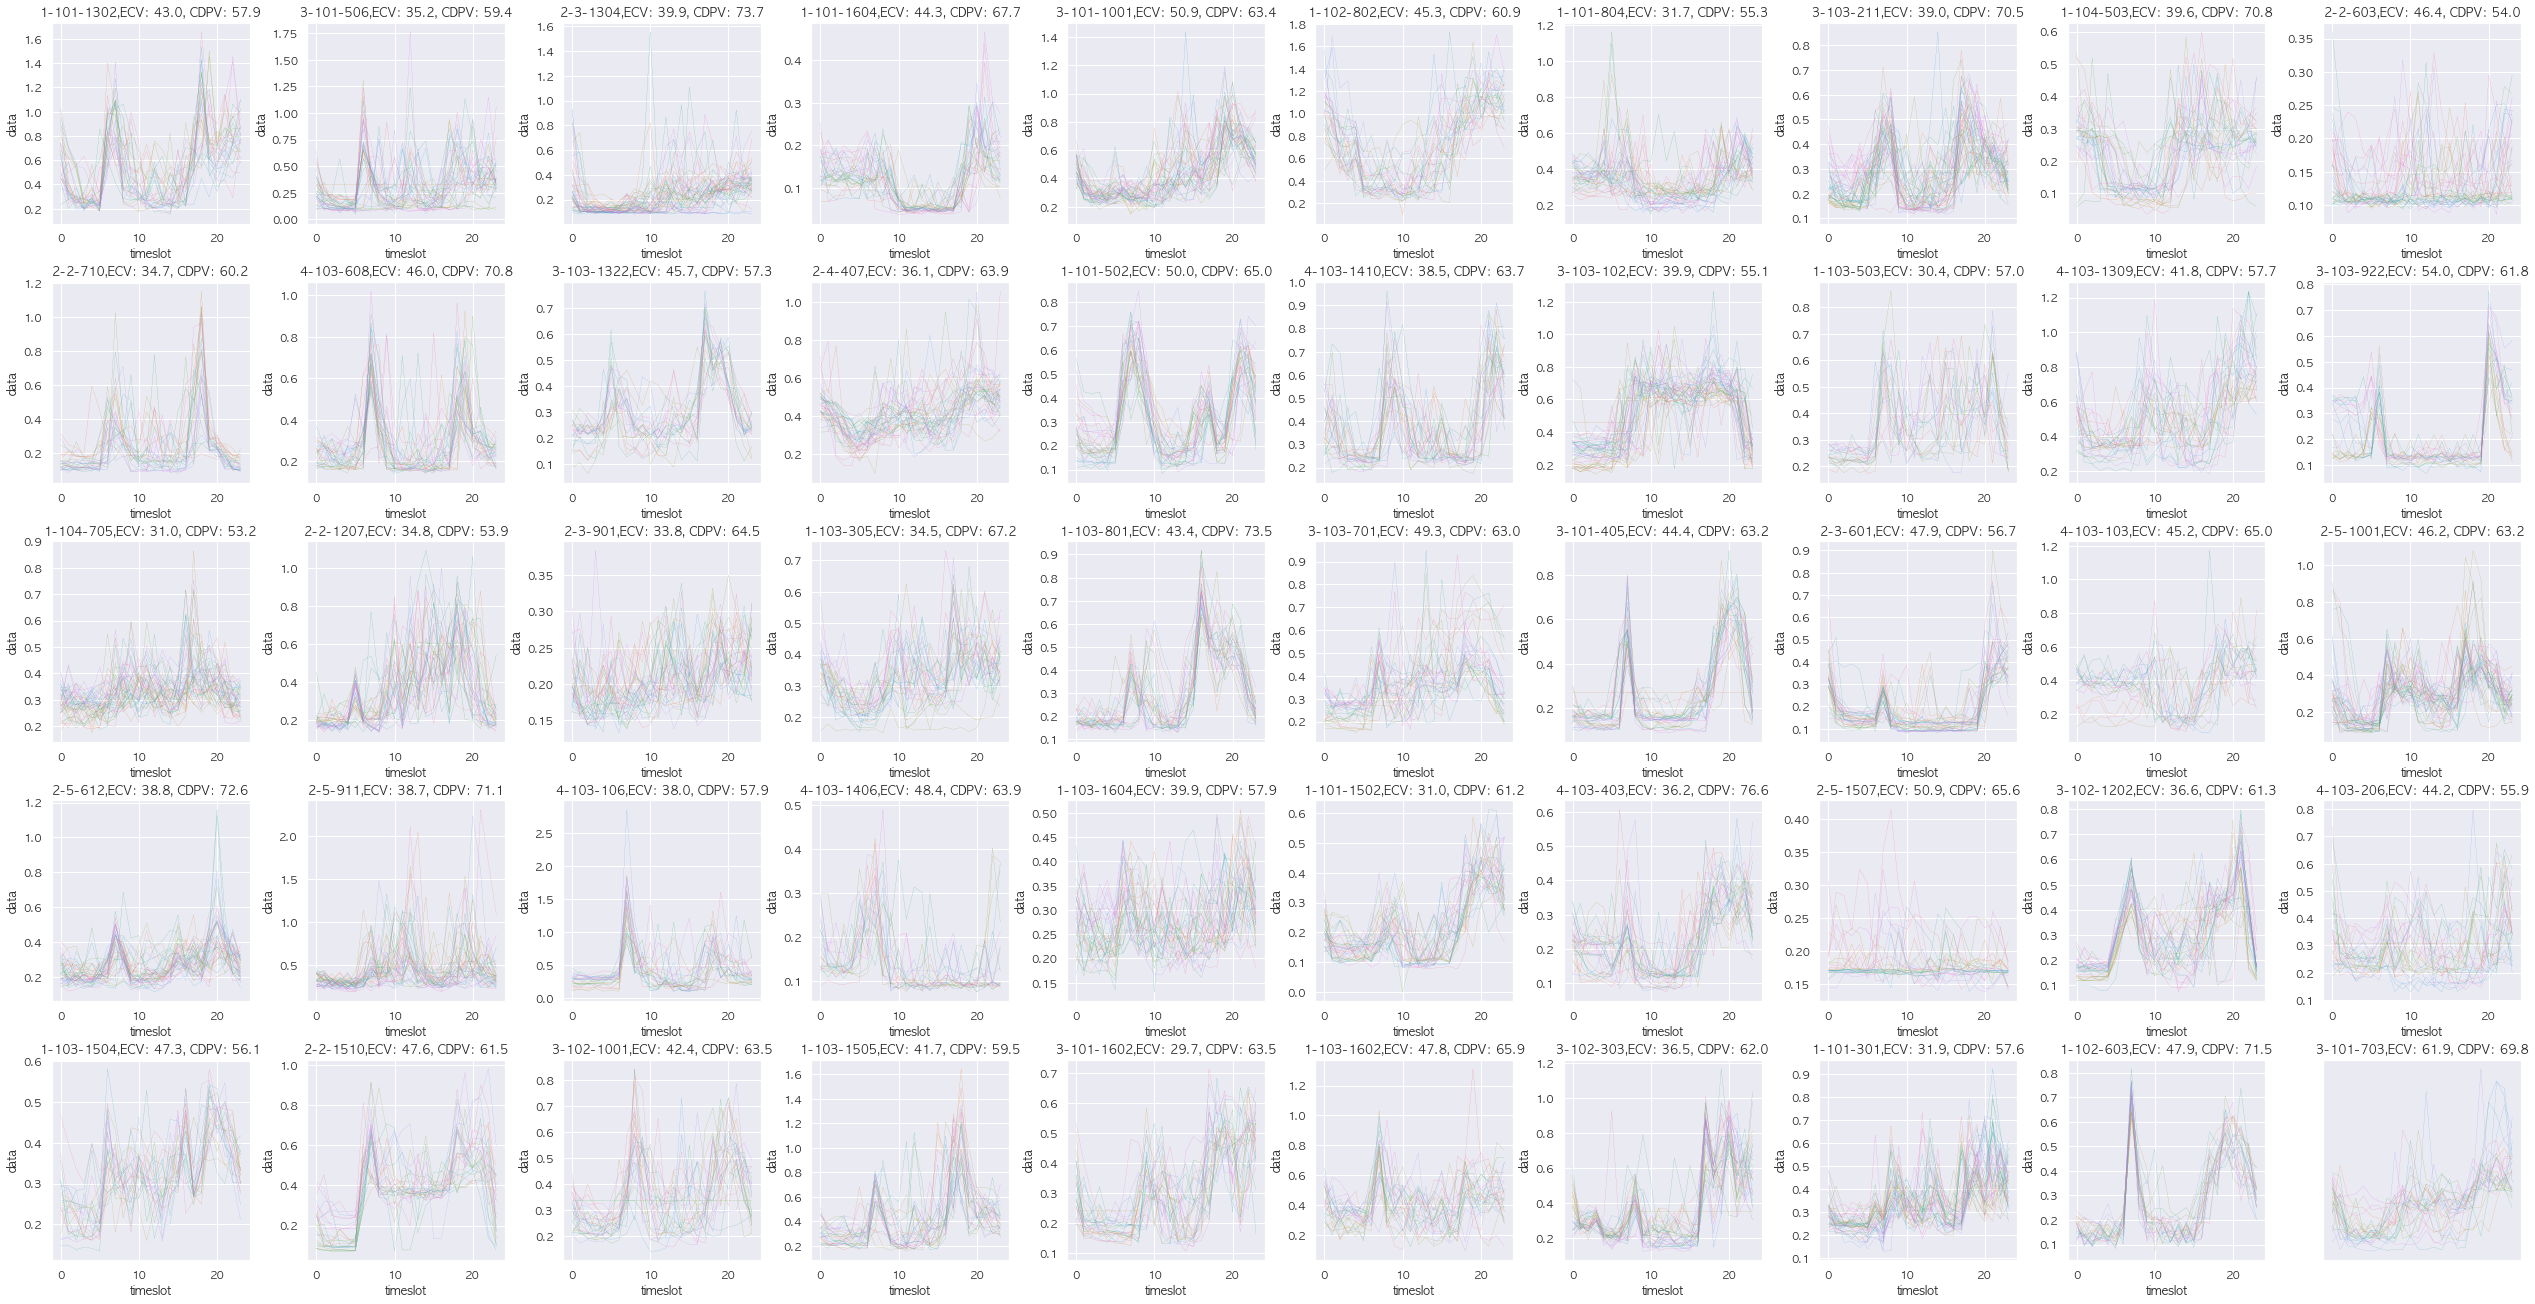

In [7]:
# 0 ~ 49 (50)
tss_transition_1 = pd.DataFrame(columns=['K','tss','wss', 'ecv', 'cdpv','og_length', 'new_length', 'sequence'])

fig, axes = plt.subplots(5,10, figsize=(35,18), constrained_layout=True)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

for seq in range(0, 50):
    datas = db.find_random(save=True, processing=True)
    datas.merging()
    print("{}: pattern recognition start".format(datas.uid))
    km = KMeans(datas.merge_datas['가을'], logging=False )
    km.run()
    
    tss_transition_1.loc[datas.uid] = [
        km.K,
        km.tss,
        km.wss,
        km.ecv,
        km.cdpv,
        km.og_length,
        km.new_length,
        km.sequence
    ]
    
    vd,dd,cdd = km.get_visual_datas(distribution_data=True, cluster_dist_data=True)
    best_k = cdd.sort_values(by=['count'], ascending=False).index[0]
    bvd = vd[vd['cluster'] == best_k]
    
    p = sns.lineplot(data=bvd, x="timeslot", y="data", hue="date",
                 label=datas.uid, lw=0.15, color="blue", ax=axes[int(seq / 10)][seq % 10], legend=False)
    p.set_title("{},ECV: {}, CDPV: {}".format(datas.uid.replace("아파트",""),format(km.ecv,".1f"), format(km.cdpv, ".1f")))
#     print(tss_transition_1)

In [8]:
tss_transition_1

,K,tss,wss,ecv,cdpv,og_length,new_length,sequence
아파트1-101-1302,7.0,128.004791,72.982999,42.984166,57.949672,91.0,86.0,10.0
아파트3-101-506,7.0,113.109979,73.340481,35.160026,59.414825,91.0,86.0,6.0
아파트2-3-1304,7.0,146.793265,88.199513,39.915831,73.726168,91.0,91.0,12.0
아파트1-101-1604,6.0,6.800487,3.786312,44.322936,67.698054,91.0,81.0,7.0
아파트3-101-1001,7.0,54.924973,26.991060,50.858310,63.407334,91.0,90.0,7.0
아파트1-102-802,7.0,108.254169,59.236089,45.280547,60.861058,91.0,85.0,12.0
아파트1-101-804,6.0,28.147077,19.229531,31.681959,55.302799,91.0,84.0,5.0
아파트3-103-211,6.0,31.503130,19.230291,38.957522,70.526131,91.0,82.0,5.0
아파트1-104-503,6.0,20.334340,12.285210,39.583927,70.750096,91.0,84.0,5.0
아파트2-2-603,6.0,11.359300,6.083114,46.448166,54.041237,91.0,83.0,7.0


In [ ]:
# 50 ~ 99 (100)
tss_transition_2 = pd.DataFrame(columns=['K','tss','wss', 'ecv', 'cdpv','og_length', 'new_length', 'sequence'])

fig, axes = plt.subplots(5,10, figsize=(35,18), constrained_layout=True)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

for seq in range(0, 50):
    datas = db.find_random(save=True, processing=True)
    datas.merging()
    print("{}: pattern recognition start".format(datas.uid))
    km = KMeans(datas.merge_datas['가을'], logging=False )
    km.run()
    
    tss_transition_2.loc[datas.uid] = [
        km.K,
        km.tss,
        km.wss,
        km.ecv,
        km.cdpv,
        km.og_length,
        km.new_length,
        km.sequence
    ]
    
    vd,dd,cdd = km.get_visual_datas(distribution_data=True, cluster_dist_data=True)
    best_k = cdd.sort_values(by=['count'], ascending=False).index[0]
    bvd = vd[vd['cluster'] == best_k]
    
    p = sns.lineplot(data=bvd, x="timeslot", y="data", hue="date",
                 label=datas.uid, lw=0.15, color="blue", ax=axes[int(seq / 10)][seq % 10], legend=False)
    p.set_title("{},ECV: {}, CDPV: {}".format(datas.uid.replace("아파트",""),format(km.ecv,".1f"), format(km.cdpv, ".1f")))
#     print(tss_transition_2)

아파트3-102-702: pattern recognition start
---Init KMeans---
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Now 2---
---Now 3---
---Now 4---
---Now 5---
---Now 6---
---Now 7---
---Now 8---
아파트2-2-1402: pattern recognition start
---Init KMeans---
---K Setting 6 ---
---6:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Now 2---
---Now 3---
---Now 4---
---Now 5---
아파트2-2-1508: pattern recognition start
---Init KMeans---
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Now 2---
---Now 3---
---Now 4---
---Now 5---
---Now 6---
---Now 7---
---Now 8---
---Now 9---
---Now 10---
아파트2-4-302: pattern recognition start
---Init KMeans---
---K Setting 7 ---
---7:Clustering Start---
---Now 1---
---First Cluster Group Init---
---Now 2---
---Now 3---
---Now 4---
---Now 5---
---Now 6---
---Now 7---
---Now 8---
---Now 9---
아파트1-103-202: pattern recognition start
---Init KMeans---
---K Setting 7 ---
---7:Clust

In [ ]:
tss_transition_2

In [ ]:
# 100 ~ 149 (150)
tss_transition_3 = pd.DataFrame(columns=['K','tss','wss', 'ecv', 'cdpv','og_length', 'new_length', 'sequence'])

fig, axes = plt.subplots(5,10, figsize=(35,18), constrained_layout=True)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

for seq in range(0, 50):
    datas = db.find_random(save=True, processing=True)
    datas.merging()
    print("{}: pattern recognition start".format(datas.uid))
    km = KMeans(datas.merge_datas['가을'], logging=False )
    km.run()
    
    tss_transition_3.loc[datas.uid] = [
        km.K,
        km.tss,
        km.wss,
        km.ecv,
        km.cdpv,
        km.og_length,
        km.new_length,
        km.sequence
    ]
    
    vd,dd,cdd = km.get_visual_datas(distribution_data=True, cluster_dist_data=True)
    best_k = cdd.sort_values(by=['count'], ascending=False).index[0]
    bvd = vd[vd['cluster'] == best_k]
    
    p = sns.lineplot(data=bvd, x="timeslot", y="data", hue="date",
                 label=datas.uid, lw=0.15, color="blue", ax=axes[int(seq / 10)][seq % 10], legend=False)
    p.set_title("{},ECV: {}, CDPV: {}".format(datas.uid.replace("아파트",""),format(km.ecv,".1f"), format(km.cdpv, ".1f")))
#     print(tss_transition_3)

In [ ]:
tss_transition_3

In [ ]:
# 150 ~ 199 (200)
tss_transition_4 = pd.DataFrame(columns=['K','tss','wss', 'ecv', 'cdpv','og_length', 'new_length', 'sequence'])

fig, axes = plt.subplots(5,10, figsize=(35,18), constrained_layout=True)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

for seq in range(0, 50):
    datas = db.find_random(save=True, processing=True)
    datas.merging()
    print("{}: pattern recognition start".format(datas.uid))
    km = KMeans(datas.merge_datas['가을'], logging=False )
    km.run()
    
    tss_transition_4.loc[datas.uid] = [
        km.K,
        km.tss,
        km.wss,
        km.ecv,
        km.cdpv,
        km.og_length,
        km.new_length,
        km.sequence
    ]
    
    vd,dd,cdd = km.get_visual_datas(distribution_data=True, cluster_dist_data=True)
    best_k = cdd.sort_values(by=['count'], ascending=False).index[0]
    bvd = vd[vd['cluster'] == best_k]
    
    p = sns.lineplot(data=bvd, x="timeslot", y="data", hue="date",
                 label=datas.uid, lw=0.15, color="blue", ax=axes[int(seq / 10)][seq % 10], legend=False)
    p.set_title("{},ECV: {}, CDPV: {}".format(datas.uid.replace("아파트",""),format(km.ecv,".1f"), format(km.cdpv, ".1f")))
#     print(tss_transition_4)

In [ ]:
tss_transition_4

In [ ]:
# 200 ~ 249 (250)
tss_transition_5 = pd.DataFrame(columns=['K','tss','wss', 'ecv', 'cdpv','og_length', 'new_length', 'sequence'])

fig, axes = plt.subplots(5,10, figsize=(35,18), constrained_layout=True)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

for seq in range(0, 50):
    datas = db.find_random(save=True, processing=True)
    datas.merging()
    print("{}: pattern recognition start".format(datas.uid))
    km = KMeans(datas.merge_datas['가을'], logging=False )
    km.run()
    
    tss_transition_5.loc[datas.uid] = [
        km.K,
        km.tss,
        km.wss,
        km.ecv,
        km.cdpv,
        km.og_length,
        km.new_length,
        km.sequence
    ]
    
    vd,dd,cdd = km.get_visual_datas(distribution_data=True, cluster_dist_data=True)
    best_k = cdd.sort_values(by=['count'], ascending=False).index[0]
    bvd = vd[vd['cluster'] == best_k]
    
    p = sns.lineplot(data=bvd, x="timeslot", y="data", hue="date",
                 label=datas.uid, lw=0.15, color="blue", ax=axes[int(seq / 10)][seq % 10], legend=False)
    p.set_title("{},ECV: {}, CDPV: {}".format(datas.uid.replace("아파트",""),format(km.ecv,".1f"), format(km.cdpv, ".1f")))
    print(tss_transition_5)

In [ ]:
tss_transition_5

In [ ]:
# 250 ~ 299 (300)
tss_transition_6 = pd.DataFrame(columns=['K','tss','wss', 'ecv', 'cdpv','og_length', 'new_length', 'sequence'])

fig, axes = plt.subplots(5,10, figsize=(35,18), constrained_layout=True)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

for seq in range(0, 50):
    datas = db.find_random(save=True, processing=True)
    datas.merging()
    print("{}: pattern recognition start".format(datas.uid))
    km = KMeans(datas.merge_datas['가을'], logging=False )
    km.run()
    
    tss_transition_6.loc[datas.uid] = [
        km.K,
        km.tss,
        km.wss,
        km.ecv,
        km.cdpv,
        km.og_length,
        km.new_length,
        km.sequence
    ]
    
    vd,dd,cdd = km.get_visual_datas(distribution_data=True, cluster_dist_data=True)
    best_k = cdd.sort_values(by=['count'], ascending=False).index[0]
    bvd = vd[vd['cluster'] == best_k]
    
    p = sns.lineplot(data=bvd, x="timeslot", y="data", hue="date",
                 label=datas.uid, lw=0.15, color="blue", ax=axes[int(seq / 10)][seq % 10], legend=False)
    p.set_title("{},ECV: {}, CDPV: {}".format(datas.uid.replace("아파트",""),format(km.ecv,".1f"), format(km.cdpv, ".1f")))
    print(tss_transition_6)

In [ ]:
tss_transition_6

In [ ]:
# 300 ~ 349 (350)
tss_transition_7 = pd.DataFrame(columns=['K','tss','wss', 'ecv', 'cdpv','og_length', 'new_length', 'sequence'])

fig, axes = plt.subplots(5,10, figsize=(35,18), constrained_layout=True)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

for seq in range(0, 50):
    datas = db.find_random(save=True, processing=True)
    datas.merging()
    print("{}: pattern recognition start".format(datas.uid))
    km = KMeans(datas.merge_datas['가을'], logging=False )
    km.run()
    
    tss_transition_7.loc[datas.uid] = [
        km.K,
        km.tss,
        km.wss,
        km.ecv,
        km.cdpv,
        km.og_length,
        km.new_length,
        km.sequence
    ]
    
    vd,dd,cdd = km.get_visual_datas(distribution_data=True, cluster_dist_data=True)
    best_k = cdd.sort_values(by=['count'], ascending=False).index[0]
    bvd = vd[vd['cluster'] == best_k]
    
    p = sns.lineplot(data=bvd, x="timeslot", y="data", hue="date",
                 label=datas.uid, lw=0.15, color="blue", ax=axes[int(seq / 10)][seq % 10], legend=False)
    p.set_title("{},ECV: {}, CDPV: {}".format(datas.uid.replace("아파트",""),format(km.ecv,".1f"), format(km.cdpv, ".1f")))
#     print(tss_transition_7)

In [ ]:
tss_transition_7

In [ ]:
# 350 ~ 392 (393) # 이상치 제거
tss_transition_8 = pd.DataFrame(columns=['K','tss','wss', 'ecv', 'cdpv','og_length', 'new_length', 'sequence'])

fig, axes = plt.subplots(5,10, figsize=(35,18), constrained_layout=True)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

for seq in range(0, 43):
    datas = db.find_random(save=True, processing=True)
    datas.merging()
    print("{}: pattern recognition start".format(datas.uid))
    km = KMeans(datas.merge_datas['가을'], logging=False )
    km.run()
    
    tss_transition_8.loc[datas.uid] = [
        km.K,
        km.tss,
        km.wss,
        km.ecv,
        km.cdpv,
        km.og_length,
        km.new_length,
        km.sequence
    ]
    
    vd,dd,cdd = km.get_visual_datas(distribution_data=True, cluster_dist_data=True)
    best_k = cdd.sort_values(by=['count'], ascending=False).index[0]
    bvd = vd[vd['cluster'] == best_k]
    
    p = sns.lineplot(data=bvd, x="timeslot", y="data", hue="date",
                 label=datas.uid, lw=0.15, color="blue", ax=axes[int(seq / 10)][seq % 10], legend=False)
    p.set_title("{},ECV: {}, CDPV: {}".format(datas.uid.replace("아파트",""),format(km.ecv,".1f"), format(km.cdpv, ".1f")))
#     print(tss_transition_8)

In [ ]:
tss_transition_8

In [ ]:
db.close()